In [3]:
# Dependencies
from pathlib import Path
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [4]:
#read in the csv file
csv_path = Path("Output/All_City.csv")
cities_df = pd.read_csv(csv_path)
cities_df.head()

,city ID,city,name,address,access,type,fee,capacity
0,0,New York,East River Plaza Garage,"520 East 117th Street, New York, NY 10035, Uni...",yes,multi-storey,yes,NaN
1,1,New York,Edison ParkFast,"375 Lafayette Street, New York, NY 10003, Unit...",yes,surface,yes,NaN
2,2,New York,"Alfred Car Park, LLC","161 West 61st Street, New York, NY 10023, Unit...",yes,underground,yes,140.0
3,3,New York,Edison ParkFast,"466 East 110th Street, New York, NY 10029, Uni...",customers,surface,yes,NaN
4,4,New York,MPG Parking,"230 East 97th Street, New York, NY 10129, Unit...",customers,multi-storey,yes,200.0


# Parking Capacity

In [5]:
#create a dataframe with just the city and capacity
cap_df = cities_df[["city", "capacity"]].dropna(how='any')
cap_df

,city,capacity
2,New York,140.0
4,New York,200.0
5,New York,150.0
6,New York,209.0
7,New York,301.0
...,...,...
150,Philadelphia,354.0
154,Philadelphia,220.0
158,Philadelphia,90.0
178,Phoenix,"1,400"


In [7]:
#convert capacity to float so we can grab mean, median, and mode
cap_df["capacity"] = cap_df["capacity"].str.replace(",", "", regex=True)
cap_df["capacity"] = cap_df["capacity"].astype(float)

In [8]:
#grab mean, median, and mode for each city's parking capacity
cities = ["New York", "Chicago", "Los Angeles", "Phoenix", 
          "Milwaukee", "Fort Worth", "Houston", "Miami", 
          "Philadelphia", "Atlanta"]

mean = []
median = []
mode = []

for city in cities:
    data = cap_df.loc[cap_df["city"]==city]["capacity"]
    mean.append(data.mean())
    median.append(data.median())
    
    try:
        mode.append(statistics.mode(data))
    except:
        pass

#get rid of nan values to make lists all the same length
mean_clean = [x for x in mean if str(x) != 'nan']

median_clean = [x for x in median if str(x) != 'nan']


In [9]:
#get rid of nan values to make lists all the same length
mean_clean = [x for x in mean if str(x) != 'nan']

median_clean = [x for x in median if str(x) != 'nan']


In [10]:
#take out nan cities so list are all the same length
city = ["New York", "Chicago", "Phoenix", 
          "Milwaukee", "Houston", 
          "Philadelphia", "Atlanta"]

stats_df = pd.DataFrame({"City": city,
                         "Mean": mean_clean,
                        "Median": median_clean,
                        "Mode": mode})
stats_df

,City,Mean,Median,Mode
0,New York,237.600000,175.0,140.0
1,Chicago,506.400000,337.0,299.0
2,Phoenix,758.000000,758.0,1400.0
3,Milwaukee,404.718750,257.5,444.0
4,Houston,481.500000,375.0,1155.0
5,Philadelphia,293.777778,280.0,403.0
6,Atlanta,453.666667,550.0,611.0


## Bar Chart of Parking Capacity

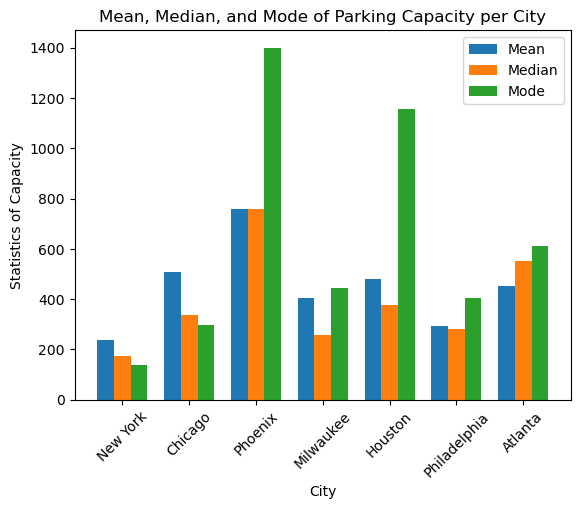

In [74]:
#create bar charts for each statistic in parking capacity
X = stats_df["City"]
mean_bar = stats_df["Mean"]
median_bar = stats_df["Median"]
mode_bar = stats_df["Mode"]

X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.0, mean_bar, width=0.25, label = 'Mean')
plt.bar(X_axis + 0.25, median_bar, width=0.25, label = 'Median')
plt.bar(X_axis + 0.50, mode_bar, width=0.25, label = 'Mode')

plt.xticks(X_axis + 0.25 , X, rotation=45)
plt.xlabel("City")
plt.ylabel("Statistics of Capacity")
plt.title("Mean, Median, and Mode of Parking Capacity per City")
plt.legend()


#save to output folder
plt.savefig("Output/Capacity_Statistics.png", bbox_inches='tight')


plt.show()

## Box Plot of Parking Capacity

In [53]:
#Find outliers 
city_boxplot = ["New York", "Chicago", "Phoenix", 
          "Milwaukee", "Houston", 
          "Philadelphia", "Atlanta"]
cap_box = []

for x in city_boxplot:
    data = cap_df.loc[cap_df["city"]==x]["capacity"]
    cap_box.append(data)
    
    quartiles = data.quantile([0.25, 0.5, 0.75]) 
    lower = quartiles[0.25]
    median = quartiles[0.5]
    upper = quartiles[0.75]
    iqr = upper - lower
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)

    print(f"{x}'s potential outliers are {lower_bound} : {upper_bound}")

New York's potential outliers are -108.25 : 509.75
Chicago's potential outliers are -140.5 : 1031.5
Phoenix's potential outliers are -526.0 : 2042.0
Milwaukee's potential outliers are -447.75 : 1116.25
Houston's potential outliers are -886.25 : 1843.75
Philadelphia's potential outliers are -100.5 : 631.5
Atlanta's potential outliers are 66.75 : 888.75


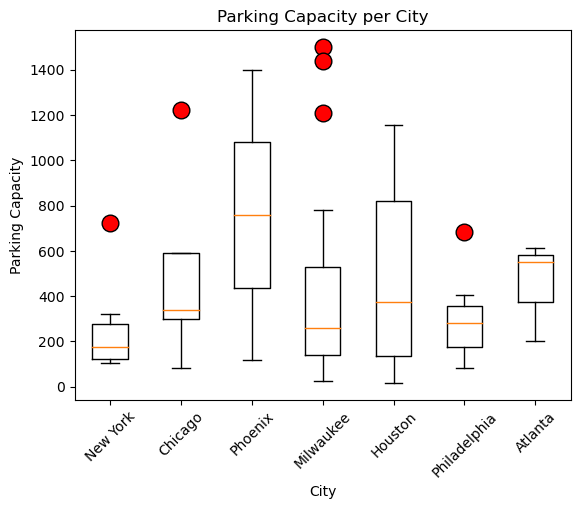

In [73]:
#create box plot of parking capacity

fig1, ax1 = plt.subplots()
ax1.set_title("Parking Capacity per City")
ax1.set_ylabel("Parking Capacity")
ax1.set_xlabel("City")
ax1.boxplot(cap_box, labels=city_boxplot, flierprops=dict(markerfacecolor="red", markersize=12))
plt.xticks(rotation=45)

#save to output folder
plt.savefig("Output/Capacity_BoxPlot.png",  bbox_inches='tight')

plt.show()